In [1]:
# to silence warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# make numpy prinoit easier to read
np.set_printoptions(precision = 3, suppress = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Data Collection and cleaning

In [586]:
column = ['mpg', 'cylinders', 'Displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [587]:
df = pd.read_csv(url, names = column, na_values = '?', sep = '\s+', skipinitialspace = True)

In [588]:
df.tail(5)

,mpg,cylinders,Displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [589]:
# we do not need car_name columns
df.drop(columns = ['car_name'], inplace = True)

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### Let us check for missing or dupliacted values 

In [591]:
df.isna().sum()

mpg             0
cylinders       0
Displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [592]:
df.dropna(inplace = True)

In [593]:
df.isna().sum()

mpg             0
cylinders       0
Displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [594]:
df.duplicated().sum()

0

We do not have any duplicated or missing values 

In [595]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


# Data Formatting

In [596]:
# let us convert the origin data series into labesl using hot one encoding

In [597]:
df['USA'] = (df['origin'] == 1)*1
df['Canada'] = (df['origin'] ==2)*1
df['Uk'] = (df['origin'] == 3)*1

In [598]:
# let us drop the origin series
df.drop(columns = ['origin'], inplace = True)

In [599]:
# Let us check all the data types  are in the right format

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   USA           392 non-null    int32  
 8   Canada        392 non-null    int32  
 9   Uk            392 non-null    int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 29.1 KB


array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'Displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'USA'}>,
        <Axes: title={'center': 'Canada'}>],
       [<Axes: title={'center': 'Uk'}>, <Axes: >, <Axes: >]], dtype=object)

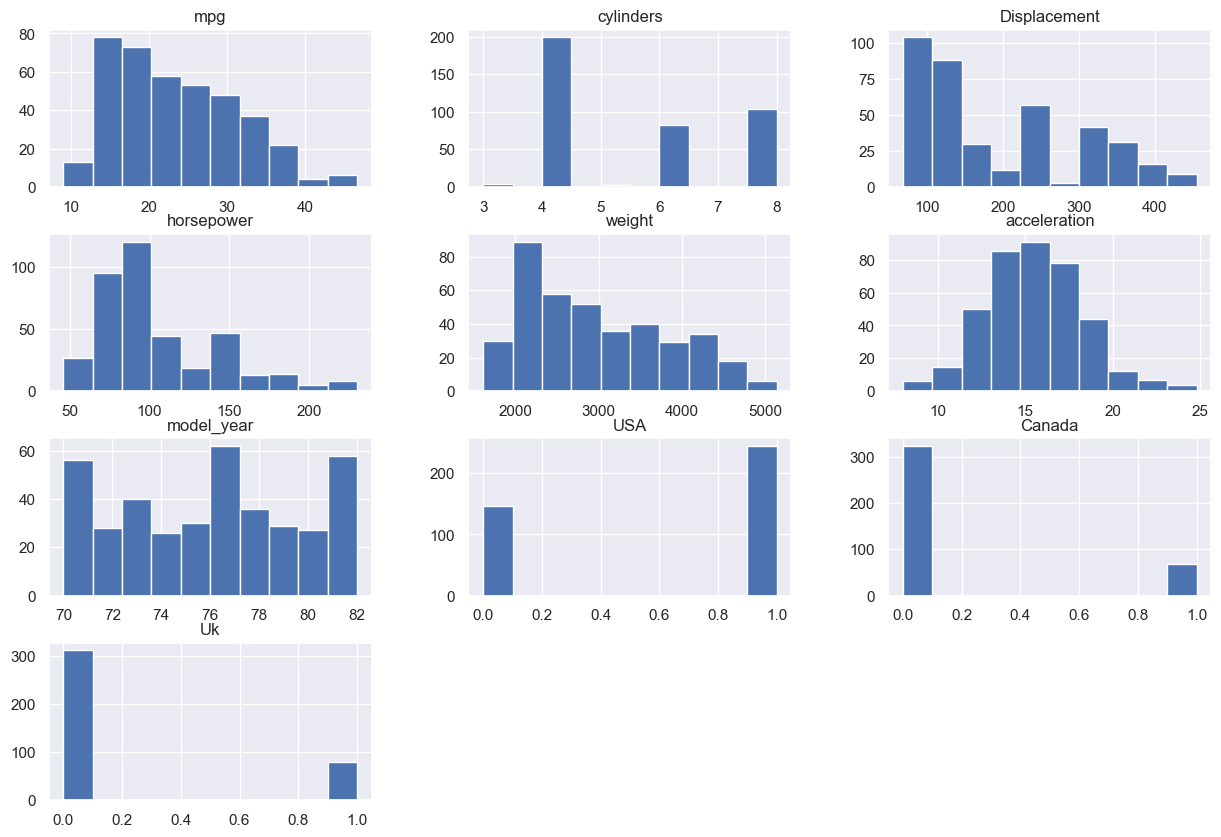

In [601]:
df.hist(figsize = (15, 10))

In [602]:
len(df['horsepower'])
len(df['mpg'])

392

In [542]:
corr_matrix = df.corr()

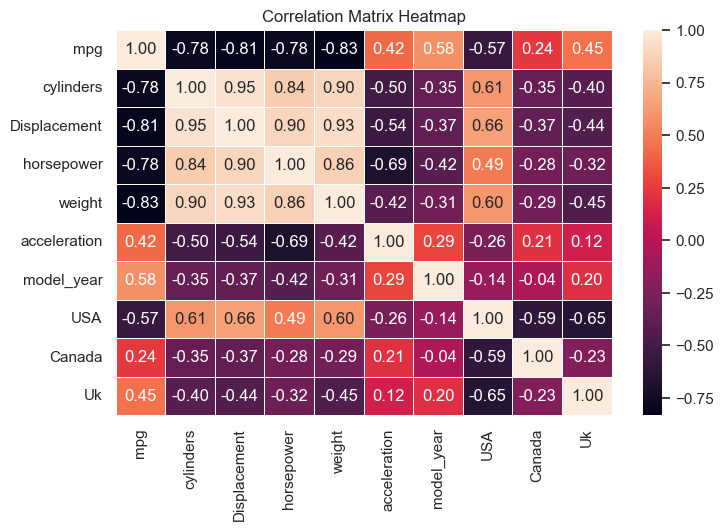

In [543]:
plt.figure(figsize = (8,5))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', linewidth = .5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Scaling

In [544]:
df.describe()

,mpg,cylinders,Displacement,horsepower,weight,acceleration,model_year,USA,Canada,Uk
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [545]:
from sklearn import preprocessing

In [546]:
x = df.drop(columns = ['mpg'])

In [547]:
y = df['mpg']

In [548]:
scaled_x = preprocessing.scale(x)

In [549]:
scaled_y = preprocessing.scale(y)

# Shuffling the data

In [550]:
shuffled_indexX = np.arange(scaled_x.shape[0])
np.random.shuffle(shuffled_indexX)

In [551]:
shuffled_x = scaled_x[shuffled_indexX]

In [552]:
shuffled_y = scaled_y[shuffled_indexX]

# Split into train and test

In [553]:
shuffled_X_count = shuffled_x.shape[0]

In [554]:
train_count = int(0.8 * shuffled_X_count)

In [555]:
test_count = int(shuffled_X_count -  train_count)

In [556]:
x_train = shuffled_x[:train_count]

In [557]:
y_train = shuffled_y[:train_count]

In [558]:
x_test = shuffled_x[train_count :]
y_test = shuffled_y[train_count :]

# Let us save in npz format

In [559]:
np.savez('autompg_train.npz', inputs = x_train, targets = y_train)
np.savez('autompg_test.npz', inputs = x_test, targets = y_test)

# Machine learning

### load the data

In [560]:
npz = np.load('autompg_train.npz')

In [561]:
train_inputs, train_targets = npz['inputs'].astype(float), npz['targets'].astype(float)

In [562]:
npz = np.load('autompg_test.npz')

In [563]:
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(float)

### model

In [564]:
input_size = 392
output_size = 392
hidden_layers_size = 2

In [565]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layers_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layers_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax')
])

In [566]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [567]:
batch_size = 100
max_epochs = 100


In [572]:
model.fit(train_inputs, train_targets, batch_size = batch_size, epochs = max_epochs, verbose = 2)

Epoch 1/100
4/4 - 0s - loss: 5.9690 - accuracy: 0.0319 - 29ms/epoch - 7ms/step
Epoch 2/100
4/4 - 0s - loss: 5.9527 - accuracy: 0.0415 - 31ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 5.9349 - accuracy: 0.0863 - 30ms/epoch - 8ms/step
Epoch 4/100
4/4 - 0s - loss: 5.9167 - accuracy: 0.1118 - 29ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 5.8979 - accuracy: 0.1597 - 36ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 5.8783 - accuracy: 0.2204 - 34ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 5.8580 - accuracy: 0.2780 - 31ms/epoch - 8ms/step
Epoch 8/100
4/4 - 0s - loss: 5.8368 - accuracy: 0.3738 - 31ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 5.8152 - accuracy: 0.4984 - 32ms/epoch - 8ms/step
Epoch 10/100
4/4 - 0s - loss: 5.7922 - accuracy: 0.5463 - 19ms/epoch - 5ms/step
Epoch 11/100
4/4 - 0s - loss: 5.7682 - accuracy: 0.5463 - 27ms/epoch - 7ms/step
Epoch 12/100
4/4 - 0s - loss: 5.7432 - accuracy: 0.5463 - 29ms/epoch - 7ms/step
Epoch 13/100
4/4 - 0s - loss: 5.7168 - accuracy: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

In [569]:
import numpy as np

# Check unique values in train_targets
unique_labels = np.unique(train_targets)
print("Unique labels in train_targets:", unique_labels)


Unique labels in train_targets: [-1.853 -1.725 -1.597 -1.468 -1.34  -1.212 -1.148 -1.083 -1.019 -0.955
 -0.93  -0.891 -0.84  -0.827 -0.763 -0.75  -0.737 -0.699 -0.686 -0.673
 -0.634 -0.622 -0.57  -0.558 -0.545 -0.519 -0.468 -0.455 -0.442 -0.416
 -0.378 -0.365 -0.339 -0.314 -0.301 -0.25  -0.237 -0.185 -0.147 -0.134
 -0.121 -0.057 -0.032  0.007  0.033  0.058  0.071  0.097  0.11   0.135
  0.199  0.212  0.251  0.264  0.302  0.328  0.379  0.392  0.405  0.456
  0.482  0.507  0.52   0.584  0.597  0.636  0.713  0.777  0.815  0.828
  0.841  0.905  0.956  0.969  1.008  1.033  1.046  1.072  1.085  1.097
  1.123  1.136  1.149  1.2    1.213  1.226  1.29   1.354  1.367  1.38
  1.418  1.482  1.572  1.611  1.623  1.662  1.739  1.777  1.829  1.867
  1.88   2.008  2.047  2.316  2.521  2.56   2.637  2.675  2.714  2.97 ]


In [570]:
# Example of replacing invalid labels with 0 (or another valid class)
valid_labels = np.where(train_targets >= 0, train_targets, 0)
train_targets = valid_labels


In [571]:
# Example of filtering out invalid labels
valid_indices = train_targets >= 0
train_inputs = train_inputs[valid_indices]
train_targets = train_targets[valid_indices]
